--- Initializing Qubit ---
Initial state angle (rel): 0.5236
Initial basis angle: 0.0000


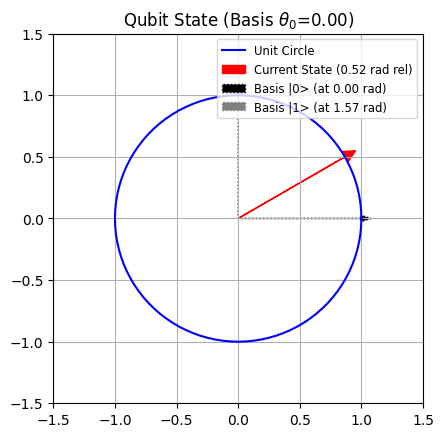


--- Rotation ---
State angle after rotation (rel): 1.5708


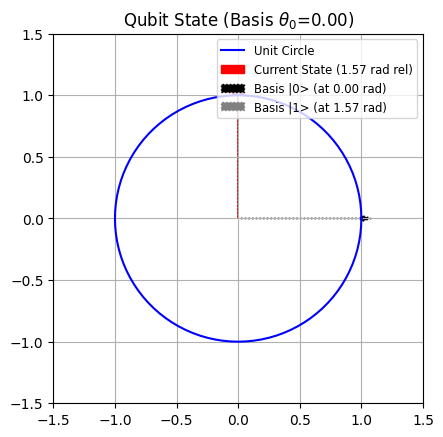


--- Reflection ---


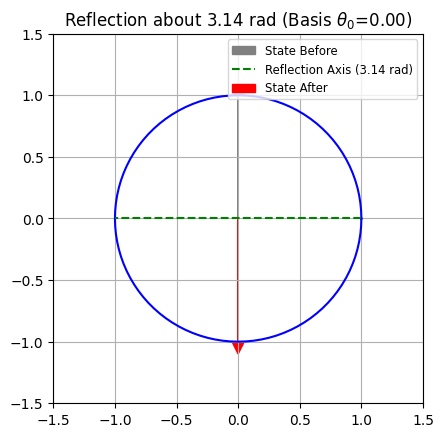

State angle after reflection (rel): 4.7124

--- Probabilities and Measurement ---
Probabilities P(0), P(1) in current basis: [0.0000, 1.0000]
Measurement results (1000 shots): {'0': 0, '1': 1000}

--- Changing Basis ---
New basis angle: 0.7854
State angle after basis change (relative to NEW basis): 3.9270


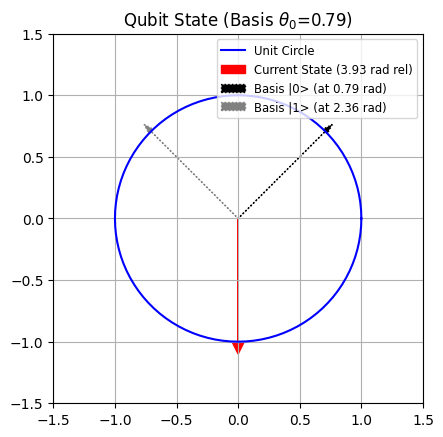


--- Drawing History (Note: plotted vs current basis) ---
This may be misleading if basis changes occurred.


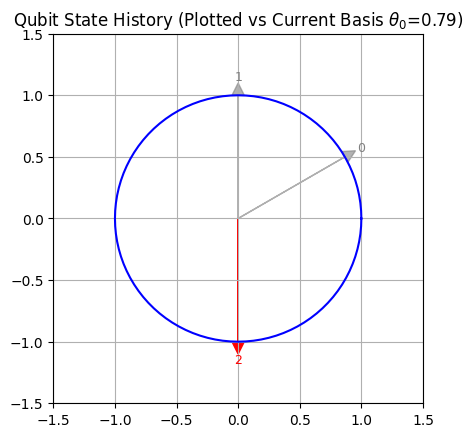


--- Drawing in Both Bases ---


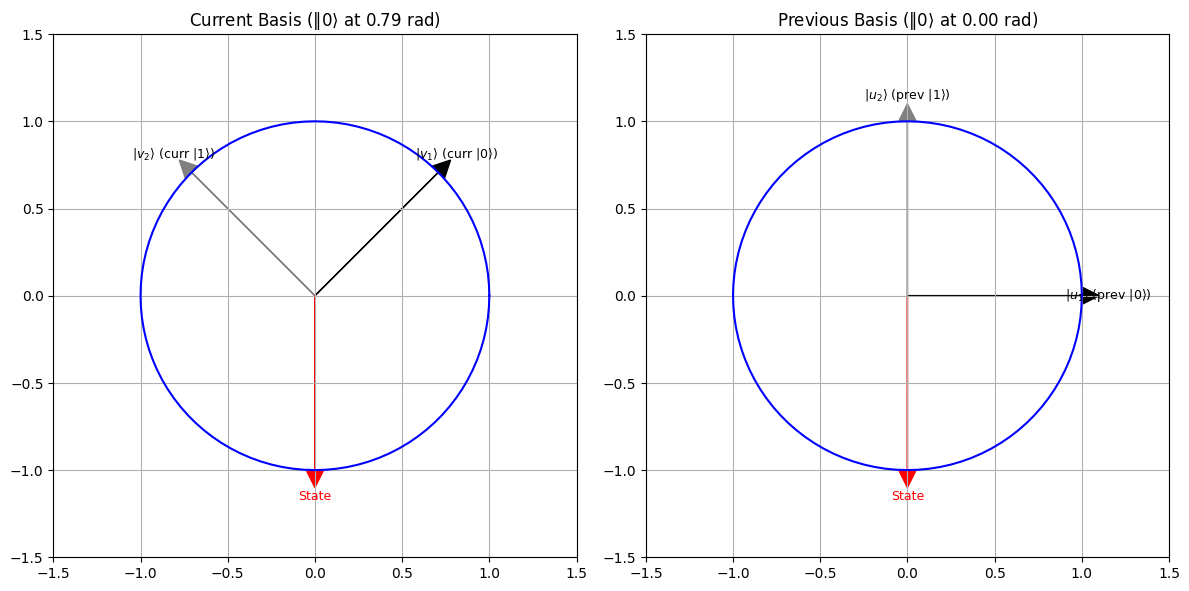


--- Probabilities in Both Bases ---
Probs 'current' : {'0': 0.5000000000000002, '1': 0.4999999999999998}
Probs 'previous': {'0': 3.374459510989179e-32, '1': 1.0}

--- Taking Back Basis Change ---
Basis angle after take_back: 0.0000
State angle after take_back (relative to restored basis): 4.7124


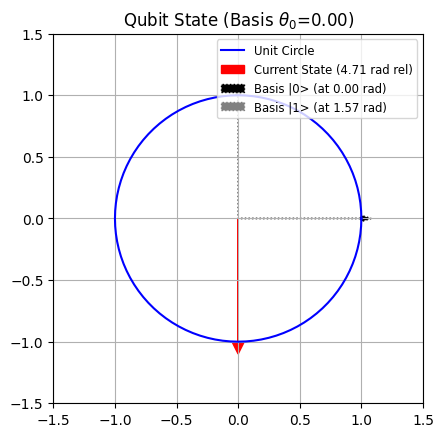


--- Trying to take back again (should do nothing) ---
No basis change history to take back.
Basis angle: 0.0000


In [44]:
import math
import random
import matplotlib.pyplot as plt

class SingleQubit():
    """
    Simulates a single real-valued qubit on the unit circle.
    Angles are in radians.
    Uses only 'math', 'random', and 'matplotlib.pyplot'.
    """
    def __init__ (self, theta = 0):
        """
        Initializes the qubit state.
        Args:
            theta (float): Initial angle in radians. Defaults to 0 (state |0>).
        """
        # State angle relative to the current basis |0> vector
        self.angle = theta % (2 * math.pi)
        # History of state angles, relative to the basis they were set in
        self.history = []
        self.history.append(self.angle)
        # Angle of the current |0> basis vector relative to the standard basis (x-axis)
        self.basis_angle = 0
        # History of previous basis angles
        self.basis_history = []

    def read_state(self):
        """Returns the current quantum state angle relative to the current basis."""
        return self.angle

    def rotation(self, theta):
        """
        Applies a rotation gate.
        Args:
            theta (float): The angle of rotation in radians.
        """
        # Rotations are relative within the current basis
        new_angle = (self.angle + theta) % (2 * math.pi)
        self.angle = new_angle
        self.history.append(new_angle)

    def reflection(self, theta):
        """
        Applies a reflection gate about the axis defined by theta (absolute angle).
        Args:
            theta (float): The angle of the reflection axis in radians (relative to standard basis).
        """
        # Reflection angle theta is absolute. Convert current state angle to absolute.
        current_abs_angle = (self.angle + self.basis_angle) % (2 * math.pi)
        # Calculate reflected absolute angle
        reflected_abs_angle = (theta - (current_abs_angle - theta)) % (2 * math.pi)
        # Convert back to angle relative to current basis
        new_angle = (reflected_abs_angle - self.basis_angle) % (2 * math.pi)
        self.angle = new_angle
        self.history.append(new_angle)

    def _get_absolute_angle(self, relative_angle):
        """Helper to get the angle relative to the standard basis."""
        return (relative_angle + self.basis_angle) % (2 * math.pi)

    def draw_state(self):
        """Draws the current quantum state as an arrow on the unit circle."""
        fig, ax = plt.subplots()
        circle_angles = [i * 2 * math.pi / 100 for i in range(101)]
        circle_x = [math.cos(a) for a in circle_angles]
        circle_y = [math.sin(a) for a in circle_angles]
        ax.plot(circle_x, circle_y, color='blue', label='Unit Circle')

        # Plot state using its absolute angle
        plot_angle = self._get_absolute_angle(self.angle)
        state_x = math.cos(plot_angle)
        state_y = math.sin(plot_angle)
        ax.arrow(0, 0, state_x, state_y, head_width=0.1, head_length=0.1, fc='red', ec='red', label=f'Current State ({self.angle:.2f} rad rel)')

        # Optionally draw basis vectors
        v0_x = math.cos(self.basis_angle)
        v0_y = math.sin(self.basis_angle)
        ax.arrow(0, 0, v0_x, v0_y, head_width=0.05, head_length=0.08, fc='black', ec='black', ls=':', label=f'Basis |0> (at {self.basis_angle:.2f} rad)')
        v1_angle = (self.basis_angle + math.pi / 2) % (2 * math.pi)
        v1_x = math.cos(v1_angle)
        v1_y = math.sin(v1_angle)
        ax.arrow(0, 0, v1_x, v1_y, head_width=0.05, head_length=0.08, fc='grey', ec='grey', ls=':', label=f'Basis |1> (at {v1_angle:.2f} rad)')


        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True)
        ax.set_title(f"Qubit State (Basis $\\theta_0$={self.basis_angle:.2f})")
        ax.legend(fontsize='small', loc='upper right')
        plt.show()

    def draw_all_states(self):
        """Draws all visited quantum states on the unit circle with order labels."""
        fig, ax = plt.subplots()
        circle_angles = [i * 2 * math.pi / 100 for i in range(101)]
        circle_x = [math.cos(a) for a in circle_angles]
        circle_y = [math.sin(a) for a in circle_angles]
        ax.plot(circle_x, circle_y, color='blue')

        # History stores angles relative to the basis AT THAT TIME.
        # To plot consistently, we need to know the basis for each history point.
        # This requires storing basis changes in history too, which wasn't specified.
        # Current implementation assumes history angles are relative to the CURRENT basis
        # for plotting purposes, which might be misleading after basis changes.
        # --> Sticking to our last implementation logic for this method:
        # --> Plotting history angles as if they are relative to the *current* basis.
        # --> A more accurate history plot would require storing (angle, basis_angle) tuples.

        print(f"Warning: draw_all_states plots history angles relative to current basis ({self.basis_angle:.2f}).")
        print("This may be misleading if basis changes occurred.")

        for i, relative_angle in enumerate(self.history):
            # Plot using absolute angle relative to standard basis
            plot_angle = self._get_absolute_angle(relative_angle)
            state_x = math.cos(plot_angle)
            state_y = math.sin(plot_angle)
            # Use different colors/alpha for history vs current? Current state is last in history.
            color = 'red' if i == len(self.history) - 1 else 'grey'
            alpha = 1.0 if i == len(self.history) - 1 else 0.6
            ax.arrow(0, 0, state_x, state_y, head_width=0.1, head_length=0.1, fc=color, ec=color, alpha=alpha)

            # Label position based on absolute angle
            label_x = state_x * 1.15
            label_y = state_y * 1.15
            ax.text(label_x, label_y, str(i), ha='center', va='center', fontsize=9, color=color)

        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True)
        ax.set_title(f"Qubit State History (Plotted vs Current Basis $\\theta_0$={self.basis_angle:.2f})")
        plt.show()

    def reflect_and_draw(self, theta):
        """
        Draws the state before, the reflection line, applies reflection, and draws the new state.
        Args:
            theta (float): The angle of the reflection axis in radians (relative to standard basis).
        """
        fig, ax = plt.subplots()
        circle_angles = [i * 2 * math.pi / 100 for i in range(101)]
        circle_x = [math.cos(a) for a in circle_angles]
        circle_y = [math.sin(a) for a in circle_angles]
        ax.plot(circle_x, circle_y, color='blue')

        # Draw 'before' state using its absolute angle
        plot_angle_before = self._get_absolute_angle(self.angle)
        state_x_before = math.cos(plot_angle_before)
        state_y_before = math.sin(plot_angle_before)
        ax.arrow(0, 0, state_x_before, state_y_before, head_width=0.1, head_length=0.1, fc='grey', ec='grey', label='State Before')

        # Draw reflection line (theta is absolute)
        ref_x = math.cos(theta)
        ref_y = math.sin(theta)
        ax.plot([-ref_x, ref_x], [-ref_y, ref_y], linestyle='--', color='green', label=f'Reflection Axis ({theta:.2f} rad)')

        # Apply reflection (updates self.angle)
        self.reflection(theta)

        # Draw 'after' state using its new absolute angle
        plot_angle_after = self._get_absolute_angle(self.angle)
        state_x_after = math.cos(plot_angle_after)
        state_y_after = math.sin(plot_angle_after)
        ax.arrow(0, 0, state_x_after, state_y_after, head_width=0.1, head_length=0.1, fc='red', ec='red', label='State After')

        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True)
        ax.set_title(f"Reflection about {theta:.2f} rad (Basis $\\theta_0$={self.basis_angle:.2f})")
        ax.legend(fontsize='small', loc='upper right')
        plt.show()

    def prob(self):
        """
        Returns the probabilities [P(0), P(1)] of measuring in the current basis.
        """
        # Probabilities depend on the angle relative to the current basis |0>
        alpha = math.cos(self.angle)
        beta = math.sin(self.angle)
        p0 = alpha * alpha
        p1 = beta * beta
        # Small correction for potential floating point inaccuracies
        p0 = max(0.0, min(1.0, p0))
        p1 = 1.0 - p0 # Ensure they sum to 1
        return [p0, p1]

    def measure(self, number_of_shots):
        """
        Simulates measurement in the current basis 'number_of_shots' times.
        Args:
            number_of_shots (int): The number of simulated measurements.
        Returns:
            dict: Counts of observed '0's and '1's.
        """
        p0, p1 = self.prob() # Probabilities in the current basis
        counts = {'0': 0, '1': 0}
        for _ in range(number_of_shots):
            random_num = random.random()
            if random_num < p0:
                counts['0'] += 1
            else:
                counts['1'] += 1
        return counts

    def change_basis(self, theta):
        """
        Changes the measurement basis.
        Args:
            theta (float): The angle of the new |0> vector relative to the standard basis.
        Raises:
            ValueError: If the new basis angle is the same as the current one.
        """
        new_basis_angle = theta % (2 * math.pi)
        # Check for floating point equality carefully if needed, simple check for now
        if abs(new_basis_angle - self.basis_angle) < 1e-9: # Tolerance for float comparison
             raise ValueError(f"Basis isn't changing! Current: {self.basis_angle:.4f}, Requested: {new_basis_angle:.4f}")

        # Store the old basis angle
        self.basis_history.append(self.basis_angle)

        # Calculate the shift needed for existing angles
        # Angle coordinates shift by -theta (new basis angle relative to old)
        # Here, theta is the new basis angle relative to standard,
        # self.basis_angle is the old basis angle relative to standard.
        # The relative shift is new_basis_angle - self.basis_angle
        angle_shift = new_basis_angle - self.basis_angle

        # Update the current basis angle
        self.basis_angle = new_basis_angle

        # Update the current state angle (relative to the NEW basis)
        self.angle = (self.angle - angle_shift) % (2 * math.pi)

        # Update history angles (relative to the NEW basis)
        # Note: This assumes history angles should be re-expressed relative to the new basis.
        self.history = [(a - angle_shift) % (2 * math.pi) for a in self.history]


    def draw_state_in_both_basis(self):
        """
        Draws the current state in the current and previous bases side-by-side.
        Raises:
            ValueError: If no basis change has occurred yet.
        """
        if not self.basis_history:
            raise ValueError("Basis has not changed yet. Cannot compare.")

        current_basis_angle = self.basis_angle
        previous_basis_angle = self.basis_history[-1]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # Adjusted size

        circle_angles = [i * 2 * math.pi / 100 for i in range(101)]
        circle_x = [math.cos(a) for a in circle_angles]
        circle_y = [math.sin(a) for a in circle_angles]

        # --- Plot 1: Current Basis (ax1) ---
        ax1.plot(circle_x, circle_y, color='blue')
        # Basis Vector |v1> (current |0>)
        v1_angle = current_basis_angle
        v1_x = math.cos(v1_angle)
        v1_y = math.sin(v1_angle)
        ax1.arrow(0, 0, v1_x, v1_y, head_width=0.1, head_length=0.1, fc='black', ec='black')
        ax1.text(v1_x * 1.15, v1_y * 1.15, r'$|v_1\rangle$ (curr $|0\rangle$)', ha='center', va='center', fontsize=9)
        # Basis Vector |v2> (current |1>)
        v2_angle = (current_basis_angle + math.pi / 2) % (2 * math.pi)
        v2_x = math.cos(v2_angle)
        v2_y = math.sin(v2_angle)
        ax1.arrow(0, 0, v2_x, v2_y, head_width=0.1, head_length=0.1, fc='grey', ec='grey')
        ax1.text(v2_x * 1.15, v2_y * 1.15, r'$|v_2\rangle$ (curr $|1\rangle$)', ha='center', va='center', fontsize=9)
        # Current State (absolute angle)
        state_abs_angle = self._get_absolute_angle(self.angle)
        state_x = math.cos(state_abs_angle)
        state_y = math.sin(state_abs_angle)
        ax1.arrow(0, 0, state_x, state_y, head_width=0.1, head_length=0.1, fc='red', ec='red')
        ax1.text(state_x * 1.15, state_y * 1.15, 'State', ha='center', va='center', color='red', fontsize=9)
        # Setup ax1
        ax1.set_title(f"Current Basis ($\\|0\\rangle$ at {current_basis_angle:.2f} rad)")
        ax1.set_xlim(-1.5, 1.5); ax1.set_ylim(-1.5, 1.5)
        ax1.set_aspect('equal', adjustable='box'); ax1.grid(True)

        # --- Plot 2: Previous Basis (ax2) ---
        ax2.plot(circle_x, circle_y, color='blue')
        # Basis Vector |u1> (previous |0>)
        u1_angle = previous_basis_angle
        u1_x = math.cos(u1_angle)
        u1_y = math.sin(u1_angle)
        ax2.arrow(0, 0, u1_x, u1_y, head_width=0.1, head_length=0.1, fc='black', ec='black')
        ax2.text(u1_x * 1.15, u1_y * 1.15, r'$|u_1\rangle$ (prev $|0\rangle$)', ha='center', va='center', fontsize=9)
        # Basis Vector |u2> (previous |1>)
        u2_angle = (previous_basis_angle + math.pi / 2) % (2 * math.pi)
        u2_x = math.cos(u2_angle)
        u2_y = math.sin(u2_angle)
        ax2.arrow(0, 0, u2_x, u2_y, head_width=0.1, head_length=0.1, fc='grey', ec='grey')
        ax2.text(u2_x * 1.15, u2_y * 1.15, r'$|u_2\rangle$ (prev $|1\rangle$)', ha='center', va='center', fontsize=9)
        # Current State (absolute angle - same as in ax1)
        ax2.arrow(0, 0, state_x, state_y, head_width=0.1, head_length=0.1, fc='red', ec='red')
        ax2.text(state_x * 1.15, state_y * 1.15, 'State', ha='center', va='center', color='red', fontsize=9)
        # Setup ax2
        ax2.set_title(f"Previous Basis ($\\|0\\rangle$ at {previous_basis_angle:.2f} rad)")
        ax2.set_xlim(-1.5, 1.5); ax2.set_ylim(-1.5, 1.5)
        ax2.set_aspect('equal', adjustable='box'); ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def prob_in_both_basis(self):
        """
        Returns probabilities P(0), P(1) in the current and previous bases.
        Returns:
            dict: Nested dictionary with probabilities.
        Raises:
            ValueError: If no basis change has occurred yet.
        """
        if not self.basis_history:
            raise ValueError("Basis has not changed yet. Cannot compare.")

        current_basis_angle = self.basis_angle
        previous_basis_angle = self.basis_history[-1]

        # Probabilities in current basis (use self.prob)
        p0_current, p1_current = self.prob()

        # Probabilities in previous basis
        # Need angle relative to the previous |0> vector
        state_abs_angle = self._get_absolute_angle(self.angle)
        angle_rel_prev = (state_abs_angle - previous_basis_angle) % (2 * math.pi)

        alpha_prev = math.cos(angle_rel_prev)
        beta_prev = math.sin(angle_rel_prev)
        p0_previous = alpha_prev * alpha_prev
        p1_previous = beta_prev * beta_prev

        # Correct for potential floating point inaccuracies
        p0_previous = max(0.0, min(1.0, p0_previous))
        p1_previous = 1.0 - p0_previous # Ensure they sum to 1

        return {
            'current': {'0': p0_current, '1': p1_current},
            'previous': {'0': p0_previous, '1': p1_previous}
        }

    def take_back_basis_change(self):
        """Undoes the last basis change."""
        if not self.basis_history:
            # Do nothing if no history
            print("No basis change history to take back.")
            return

        # Angle of the basis we are restoring
        restored_basis_angle = self.basis_history.pop()

        # The angle shift we need to apply is the angle of the current basis
        # relative to the basis we are restoring.
        angle_shift_reverse = self.basis_angle - restored_basis_angle

        # Set the basis angle back to the restored one FIRST
        self.basis_angle = restored_basis_angle

        # Update the current angle (relative to the RESTORED basis)
        self.angle = (self.angle + angle_shift_reverse) % (2 * math.pi)

        # Update all historical angles (relative to the RESTORED basis)
        # Note: This assumes history angles should be re-expressed relative to the restored basis.
        self.history = [(angle + angle_shift_reverse) % (2 * math.pi) for angle in self.history]

# --- Example Usage ---
print("--- Initializing Qubit ---")
my_qubit = SingleQubit(theta=math.pi / 6) # Start at 30 degrees
print(f"Initial state angle (rel): {my_qubit.read_state():.4f}")
print(f"Initial basis angle: {my_qubit.basis_angle:.4f}")
my_qubit.draw_state()

print("\n--- Rotation ---")
my_qubit.rotation(math.pi / 3) # Rotate by 60 degrees
print(f"State angle after rotation (rel): {my_qubit.read_state():.4f}")
my_qubit.draw_state()

print("\n--- Reflection ---")
reflect_axis = math.pi # Reflect across x-axis (180 deg)
my_qubit.reflect_and_draw(reflect_axis)
print(f"State angle after reflection (rel): {my_qubit.read_state():.4f}")

print("\n--- Probabilities and Measurement ---")
probs = my_qubit.prob()
print(f"Probabilities P(0), P(1) in current basis: [{probs[0]:.4f}, {probs[1]:.4f}]")
counts = my_qubit.measure(1000)
print(f"Measurement results (1000 shots): {counts}")

print("\n--- Changing Basis ---")
new_basis_theta = math.pi / 4 # New |0> at 45 degrees
my_qubit.change_basis(new_basis_theta)
print(f"New basis angle: {my_qubit.basis_angle:.4f}")
print(f"State angle after basis change (relative to NEW basis): {my_qubit.read_state():.4f}")
my_qubit.draw_state() # Draw state in the new basis context

print("\n--- Drawing History (Note: plotted vs current basis) ---")
my_qubit.draw_all_states()

print("\n--- Drawing in Both Bases ---")
my_qubit.draw_state_in_both_basis()

print("\n--- Probabilities in Both Bases ---")
probs_both = my_qubit.prob_in_both_basis()
print(f"Probs 'current' : {probs_both['current']}")
print(f"Probs 'previous': {probs_both['previous']}")

print("\n--- Taking Back Basis Change ---")
my_qubit.take_back_basis_change()
print(f"Basis angle after take_back: {my_qubit.basis_angle:.4f}") # Should be 0 again
print(f"State angle after take_back (relative to restored basis): {my_qubit.read_state():.4f}")
my_qubit.draw_state() # Should show state relative to original basis

print("\n--- Trying to take back again (should do nothing) ---")
my_qubit.take_back_basis_change()
print(f"Basis angle: {my_qubit.basis_angle:.4f}")